Liczba wartości singularnych potrzebna do zachowania 90% informacji: 49


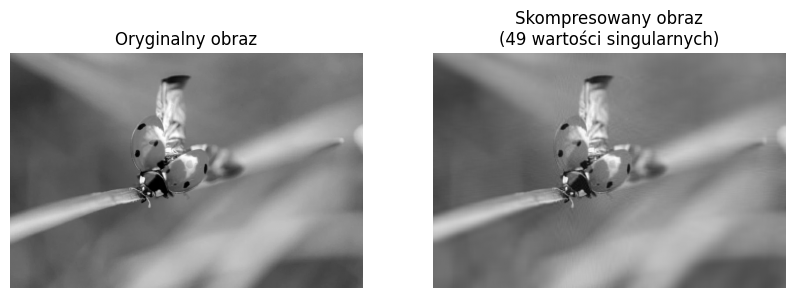

In [4]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

# Wczytaj obraz
A = imread('2.webp')

# Konwersja do skali szarości (średnia z kanałów RGB)
X = np.mean(A, -1)

# Oblicz SVD
U, S, VT = np.linalg.svd(X, full_matrices=False)

# Oblicz skumulowaną energię
cumulative_energy = np.cumsum(S) / np.sum(S)

# Znajdź liczbę wartości singularnych potrzebną do 90% energii
r90 = np.argmax(cumulative_energy >= 0.9) + 1
print(f"Liczba wartości singularnych potrzebna do zachowania 90% informacji: {r90}")

# Rekonstrukcja obrazu z r90 wartościami singularnymi
S_r = np.diag(S[:r90])
X_r = U[:, :r90] @ S_r @ VT[:r90, :]

# Wyświetl oryginał i skompresowany obraz
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Oryginalny obraz")
plt.imshow(X, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Skompresowany obraz\n({r90} wartości singularnych)")
plt.imshow(X_r, cmap='gray')
plt.axis('off')

plt.show()
